# DISPLAY RESULTS

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.ticker import MaxNLocator, MultipleLocator

from envs.minigrid import GridWorldEnv

In [2]:
def retrieve_df_data_from_folder_path(folder_path,model_name, nav_type, load_model=False):
    df_list = []
    filepath_list = []
    i=0
    
    for dirpath, dirnames, filenames in os.walk(folder_path):
        #print(model_name+'.pkl' in dirpath.split('/')[-1], dirpath.split('/')[-1], model_name)
        # print('I want : True, True, pkl in modelname ')
        
        if len(dirnames) != 0:  # Skip directories that contain subdirectories
            continue
        elif nav_type == 'goal' and 'cscg' in model_name and 'blank' in model_name:
            pass
        elif nav_type == 'goal' and 'cscg' in model_name and not model_name+'.pkl' in dirpath.split('/')[-1]:
            continue
        #We want a model as prior
        elif nav_type == 'goal' and 'ours' in model_name and load_model and not model_name+'.pkl' in dirpath.split('/')[-1]:
            continue
        #Vanilla model
        elif nav_type == 'goal' and 'ours' in model_name and not load_model and model_name+'.pkl' in dirpath.split('/')[-1]:
            continue
        i+=1
        #print('dirpath', dirpath,i)
        for file in filenames:
            if file.endswith('.xlsx'):
                file_path = os.path.join(dirpath, file)
                try:
                    df = pd.read_excel(file_path)
                    # if df['error'][0] != False or df['error'][0] !=0:
                    #     print('erase',file_path)
                    #     os.system(f'rm -rf {file_path}')
                    # df.fillna(value=0, inplace=True)  # Fill any blank cells with 'NA'
                    df_list.append(df)
                    filepath_list.append(dirpath)
                except pd.errors.ParserError as e:
                    print(f"Skipping file {file_path} due to ParserError: {e}")

    return df_list, filepath_list

In [32]:
width = 0.7 /(6 + 6)
width

0.05833333333333333

In [35]:
#BAR PLOTS AVERAGE_STEPS
def bar_plot(data, group, data_name, group_name, model_names):
    num_groups = len(set(group))
    fig_width = max(5, num_groups * 0.9) 
    width = 0.7 / (len(data) )
    bar_pose = -0.7 / (len(data) )
    plt.grid(axis='y', alpha=0.5, zorder=0)

    colors = ['green', 'darkgreen', 'orange', 'gold', 'cyan', 'blue', 'purple', 'grey', 'pink', 'indianred']
    x = np.arange(len(group)) 
    for id, model in enumerate(data):
        # plot data in grouped manner of bar type 
        plt.bar(x + bar_pose, model, width, color=colors[id], zorder=2) 
        bar_pose += 0.7 / (len(data) )
    plt.xticks(x, group) 
    plt.xlabel(group_name) 
    plt.ylabel(data_name) 
    plt.legend(model_names, loc='upper center', bbox_to_anchor=(1.3, 0.99)) 
    
    # Calculate figure size based on number of unique groups
    fig_width = max(8, num_groups * 0.9)  
    fig_height = 6
    plt.gcf().set_size_inches(fig_width, fig_height)
    
    plt.savefig('figures/' + data_name + '_models_per_' + group_name + '.jpg')
    plt.show()


In [4]:
possible_actions = {'LEFT':0, 'RIGHT':1, 'UP':2, 'DOWN':3, 'STAY':4}

In [18]:
from envs.modules import get_l2_distance, astar

def min_steps_to_visit_all_rooms(rooms, pose):
    desired_poses = [coord for coord in ((i, j) for i in range(rooms.shape[0]) \
                                for j in range(rooms.shape[1]) if rooms[i, j] != -1)]
    
    # print('desired_poses', desired_poses)
    distance = 0
    desired_poses.remove(pose)

    while len(desired_poses) > 0:
        all_relative_dists = []
        for r, c in desired_poses:
            relative_dist = get_l2_distance(r, pose[0], c, pose[1])
            all_relative_dists.append(relative_dist)
        if len(all_relative_dists) == 0:
            return distance
        closest_goal_idx = np.argmin(all_relative_dists)
        path = astar(rooms, pose, desired_poses[closest_goal_idx] )
        pose = path[-1]
        distance += len(path) -1
        # print('before',len(desired_poses))
        desired_poses = [pose for pose in desired_poses if pose not in path]
        # print('after' ,len(path)-1, len(desired_poses))
    return distance

## Average Steps

### Agglomerate data

In [6]:
env = 'grid_3x3'
model_name = 'ours_v3'
nav_type = 'goal'
if 'ours' in model_name:
    who = 'ours'
else:
    who = 'cscg'

# Set the path to the folder containing the excel files
if nav_type == 'exploration':
    folder_path = 'results/'+ env +'/' + who+'_'+ nav_type +'/' + model_name
else:
    folder_path = 'results/'+ env +'/' + who+'_'+ nav_type

print(folder_path)

df_list, filepath_list = retrieve_df_data_from_folder_path(folder_path,model_name, nav_type)
combined_df = pd.concat(df_list)
# print(len(df_list))
# # Write the combined DataFrame to a new excel file
combined_df.to_excel('results/' + env+'_'+model_name+'_'+ nav_type +'_combined.xlsx', index=False)


results/grid_3x3/ours_goal


### exploration

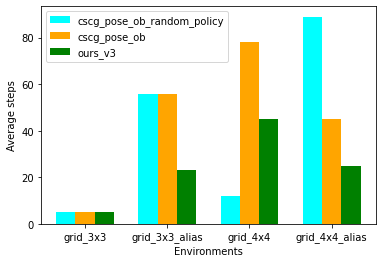

In [7]:
#TEST BAR PLOT

# create data 

envs = ['grid_3x3', 'grid_3x3_alias', 'grid_4x4', 'grid_4x4_alias']
model_names = ['cscg_pose_ob_random_policy', 'cscg_pose_ob', 'ours_v3', ]

model1 = [5, 56, 12, 89] 
model2 = [5, 56, 78, 45] 
model3 = [5, 23, 45, 25] 

av_steps = [model1]
av_steps.append(model2)
av_steps.append(model3)
width = 0.7/len(av_steps)

bar_pose = -0.7/len(av_steps) 

colors = ['cyan','orange', 'green']
x = np.arange(len(envs)) 
for id, model in enumerate(av_steps):
    # plot data in grouped manner of bar type 
    plt.bar(x+bar_pose, model, width, color=colors[id]) 
    bar_pose+= 0.7/len(av_steps) 
    # plt.bar(x, model2, width, color=) 
    # plt.bar(x+0.2, model3, width, color=) 
plt.xticks(x, envs) 
plt.xlabel("Environments") 
plt.ylabel("Average steps") 
plt.legend(model_names) 
plt.show() 


In [17]:
#GET AVERAGE STEPS PERFECT TRANSITION PER MODEL AND ENVS
envs = ['grid_3x3', 'grid_3x3_alias', 'grid_4x4', 'grid_4x4_alias', 'grid_t_maze', 'grid_t_maze_alias', 'grid_donut']
model_names = ['cscg_pose_ob_random_policy', 'cscg_pose_ob', 'cscg_random_policy', 'cscg','ours_v3','ours_v4_VANILLA','ours_v4_MMP']
nav_type = 'exploration'

average_steps = [[0]*(len(envs)) for _ in range(len(model_names)+1)]
for id_m, model_name in enumerate(model_names):
    for id_e, env in enumerate(envs):
        a_failure = 0
        # i = 0
        average_steps_model = []
        # Set the path to the folder containing the excel files
        if 'ours' in model_name:
            who = 'ours'
        else:
            who = 'cscg'
        folder_path = 'results/'+ env +'/' + who+'_'+ nav_type +'/' + model_name
        df_list, filepath_list = retrieve_df_data_from_folder_path(folder_path,model_name, nav_type)
        print('model', model_name, 'env', env,'number of tests:', len(df_list))
        for df in df_list:
            headers = list(df.columns.values)
            stop_condition_header = [s for s in headers if 'stop_condition_' in s][0]
            # i+=1
            if df[stop_condition_header][0] == True:
                average_steps_model.append(len(df['steps'])-1)
            else:
                a_failure+=1
                # print('failure ', i)
        print('average_steps_model', average_steps_model, len(average_steps_model))
        print('there is ', a_failure, 'over', len(filepath_list), 'models')
        average_steps[id_m][id_e] = np.mean(average_steps_model)
        print()
        if len(filepath_list) == 0:
            continue
        #print('model', model_name,id_m, 'env', env, np.mean(average_steps_model))
        #THIS ASSUMES WE HAVE SQUARED ENVS
        if 'x' in env:
            dim_env = [substring for substring in env.split('_') if 'x' in substring][0]
            average_steps[-1][id_e] =  int(dim_env[-1]) * 4 -1
        else:
            env_setup = GridWorldEnv(env, {})
            if isinstance(average_steps[-1][id_e], int):
                average_steps[-1][id_e] = []
            # print('pose', df['poses'][0], type(df['poses'][0]), type(eval(df['poses'][0])))
            average_steps[-1][id_e].append(min_steps_to_visit_all_rooms(env_setup.rooms, eval(df['poses'][0])))
            
model_names.append('oracle')
for id_m, model_name in enumerate(model_names):
    for id_e, env in enumerate(envs):
        if isinstance(average_steps[-1][id_e], list):
            average_steps[-1][id_e] = np.mean(average_steps[-1][id_e])
print(average_steps)

model cscg_pose_ob_random_policy env grid_3x3 number of tests: 15
average_steps_model [180, 200, 220, 205, 190, 245, 210, 220, 205, 215, 180, 190, 190, 180, 255] 15
there is  0 over 15 models

model cscg_pose_ob_random_policy env grid_3x3_alias number of tests: 12
average_steps_model [205, 245, 200, 210, 205, 235, 205, 165, 245, 195, 200, 215] 12
there is  0 over 12 models

model cscg_pose_ob_random_policy env grid_4x4 number of tests: 12
average_steps_model [395, 335, 400, 310, 465, 345, 365, 345, 365, 480] 10
there is  2 over 12 models

model cscg_pose_ob_random_policy env grid_4x4_alias number of tests: 12
average_steps_model [315, 340, 320, 430, 445, 445, 315, 320, 365, 425, 505, 470] 12
there is  0 over 12 models

model cscg_pose_ob_random_policy env grid_t_maze number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model cscg_pose_ob_random_policy env grid_t_maze_alias number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model cscg_pose_ob_random

/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


model cscg_pose_ob env grid_3x3 number of tests: 15
average_steps_model [220, 185, 220, 220, 330, 260, 205, 190, 235, 205, 195, 210, 200, 240, 205] 15
there is  0 over 15 models

model cscg_pose_ob env grid_3x3_alias number of tests: 10
average_steps_model [185, 210, 200, 205, 155, 235, 205, 215, 195, 210] 10
there is  0 over 10 models

model cscg_pose_ob env grid_4x4 number of tests: 12
average_steps_model [370, 330, 425, 590, 305, 440, 325, 475, 360, 395, 445] 11
there is  1 over 12 models

model cscg_pose_ob env grid_4x4_alias number of tests: 12
average_steps_model [525, 365, 325, 505, 415, 375, 315, 320, 410, 355, 325, 415] 12
there is  0 over 12 models

model cscg_pose_ob env grid_t_maze number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model cscg_pose_ob env grid_t_maze_alias number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model cscg_pose_ob env grid_donut number of tests: 0
average_steps_model [] 0
there is  0 over 0 models



/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


model cscg_random_policy env grid_3x3 number of tests: 12
average_steps_model [170, 340, 215, 180, 260, 180, 205, 205, 195, 210, 225, 190] 12
there is  0 over 12 models

model cscg_random_policy env grid_3x3_alias number of tests: 11
average_steps_model [365, 315, 325, 380, 315, 300] 6
there is  5 over 11 models

model cscg_random_policy env grid_4x4 number of tests: 14
average_steps_model [455, 530, 365, 360, 560, 325, 325, 375, 400, 400, 640, 425, 295] 13
there is  1 over 14 models

model cscg_random_policy env grid_4x4_alias number of tests: 14
average_steps_model [495, 530, 575, 500, 540, 665, 415, 595] 8
there is  6 over 14 models

model cscg_random_policy env grid_t_maze number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model cscg_random_policy env grid_t_maze_alias number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model cscg_random_policy env grid_donut number of tests: 0
average_steps_model [] 0
there is  0 over 0 models



/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


model cscg env grid_3x3 number of tests: 16
average_steps_model [180, 400, 185, 190, 255, 190, 210, 195, 320, 210, 245, 220, 235, 185, 295, 195] 16
there is  0 over 16 models

model cscg env grid_3x3_alias number of tests: 11
average_steps_model [395, 400, 290, 385, 390, 380] 6
there is  5 over 11 models

model cscg env grid_4x4 number of tests: 14
average_steps_model [415, 345, 350, 400, 420, 315, 330, 395, 415, 325, 400, 360, 385, 405] 14
there is  0 over 14 models

model cscg env grid_4x4_alias number of tests: 12
average_steps_model [425, 695, 405, 580, 650, 550, 410, 595, 355] 9
there is  3 over 12 models

model cscg env grid_t_maze number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model cscg env grid_t_maze_alias number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model cscg env grid_donut number of tests: 0
average_steps_model [] 0
there is  0 over 0 models



/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


model ours_v3 env grid_3x3 number of tests: 27
average_steps_model [17, 15, 16, 17, 15, 15, 17, 15, 16, 17, 16, 16, 17, 16, 14, 14, 16, 15, 17, 19, 17, 16, 16, 17, 15, 16, 16] 27
there is  0 over 27 models

model ours_v3 env grid_3x3_alias number of tests: 11
average_steps_model [23, 17, 15, 22, 29, 19, 27, 15, 16, 17, 17] 11
there is  0 over 11 models

model ours_v3 env grid_4x4 number of tests: 15
average_steps_model [98, 81, 106, 106, 41, 65, 107, 89, 87, 66, 74, 65, 79, 80, 107] 15
there is  0 over 15 models

model ours_v3 env grid_4x4_alias number of tests: 15
average_steps_model [59, 84, 106, 84, 94, 91, 113, 86, 97, 42, 86, 94, 42, 106, 91] 15
there is  0 over 15 models

model ours_v3 env grid_t_maze number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model ours_v3 env grid_t_maze_alias number of tests: 0
average_steps_model [] 0
there is  0 over 0 models

model ours_v3 env grid_donut number of tests: 0
average_steps_model [] 0
there is  0 over 0 models



/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/idlab332/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


model ours_v4_VANILLA env grid_3x3 number of tests: 12
average_steps_model [17, 24, 18, 14, 17, 18, 17, 15, 18, 15, 14, 14] 12
there is  0 over 12 models

model ours_v4_VANILLA env grid_3x3_alias number of tests: 10
average_steps_model [14, 16, 34, 17, 22, 14, 22, 22, 22, 24] 10
there is  0 over 10 models

model ours_v4_VANILLA env grid_4x4 number of tests: 11
average_steps_model [44, 29, 37, 44, 42, 28, 31, 28, 42, 28, 44] 11
there is  0 over 11 models

model ours_v4_VANILLA env grid_4x4_alias number of tests: 10
average_steps_model [53, 39, 44, 46, 48, 49, 49, 45, 46, 40] 10
there is  0 over 10 models

model ours_v4_VANILLA env grid_t_maze number of tests: 11
average_steps_model [14, 12, 14, 14, 12, 14, 14, 11, 14, 14, 12] 11
there is  0 over 11 models

pose (1, 2) <class 'str'> <class 'tuple'>
filepath_list ['results/grid_t_maze/ours_exploration/ours_v4_VANILLA/ours_v4_VANILLA_2024-02-20-15-13-35', 'results/grid_t_maze/ours_exploration/ours_v4_VANILLA/ours_v4_VANILLA_2024-02-20-15-1

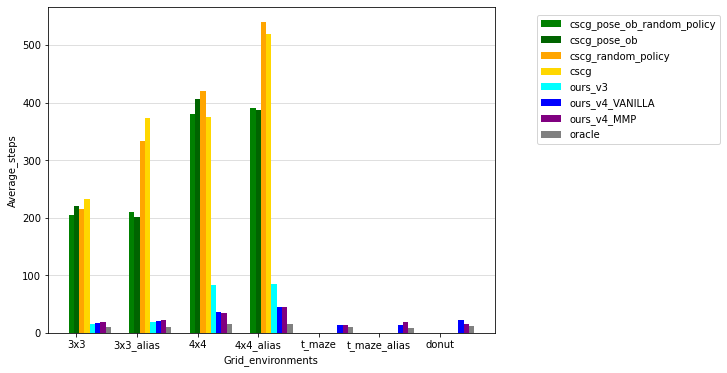

In [38]:
#BAR PLOTS AVERAGE_STEPS
envs_names = [env.replace('grid_', '') for env in envs]
bar_plot(average_steps, envs_names, 'Average_steps', 'Grid_environments', model_names)

In [ ]:
#GET AVERAGE STEPS DISCOVERED ALL STATES PER MODEL AND ENVS
envs = ['grid_3x3', 'grid_3x3_alias', 'grid_4x4', 'grid_4x4_alias']
model_names = ['cscg_pose_ob_random_policy', 'cscg_pose_ob','cscg_random_policy','cscg','ours_v3', 'ours_v4_VANILLA', 'ours_v4_MMP']
nav_type = 'exploration'

average_steps = [[0]*(len(envs)) for _ in range(len(model_names)+1)]
for id_m, model_name in enumerate(model_names):
    for id_e, env in enumerate(envs):
 
        #Get n_rooms
        dim_env = [substring for substring in env.split('_') if 'x' in substring][0]
        width_dim_env = int(dim_env[-1])
        height_dim_env = int(dim_env[0])
        n_rooms = width_dim_env* height_dim_env


        average_steps_model = []
        # Set the path to the folder containing the excel files
        if 'ours' in model_name:
            who = 'ours'
        else:
            who = 'cscg'
        folder_path = 'results/'+ env +'/' + who+'_'+ nav_type +'/' + model_name
        df_list, filepath_list = retrieve_df_data_from_folder_path(folder_path,model_name, nav_type)
        print('model', model_name, 'env', env,'number of tests:', len(df_list))
        for df in df_list:
            pose_list = []
            for n_steps, pose in enumerate(df['poses']):
                if pose not in pose_list:
                    pose_list.append(pose)
                    if len(pose_list) == n_rooms:
                        average_steps_model.append(n_steps)
                        #print('model', model_name,id_m, 'env', env, np.mean(average_steps_model))
                        break
        average_steps[id_m][id_e] = np.mean(average_steps_model)
        #print('model', model_name,id_m, 'env', env, np.mean(average_steps_model))
        
        average_steps[-1][id_e] =  int(dim_env[-1]) * 4 -1
model_names.append('oracle')

model cscg_pose_ob_random_policy env grid_3x3 number of tests: 15
model cscg_pose_ob_random_policy env grid_3x3_alias number of tests: 12
model cscg_pose_ob_random_policy env grid_4x4 number of tests: 12
model cscg_pose_ob_random_policy env grid_4x4_alias number of tests: 12
model cscg_pose_ob env grid_3x3 number of tests: 15
model cscg_pose_ob env grid_3x3_alias number of tests: 10
model cscg_pose_ob env grid_4x4 number of tests: 12
model cscg_pose_ob env grid_4x4_alias number of tests: 12
model cscg_random_policy env grid_3x3 number of tests: 12
model cscg_random_policy env grid_3x3_alias number of tests: 11
model cscg_random_policy env grid_4x4 number of tests: 10
model cscg_random_policy env grid_4x4_alias number of tests: 10
model cscg env grid_3x3 number of tests: 16
model cscg env grid_3x3_alias number of tests: 11
model cscg env grid_4x4 number of tests: 10
model cscg env grid_4x4_alias number of tests: 8
model ours_v3 env grid_3x3 number of tests: 27
model ours_v3 env grid_3x3

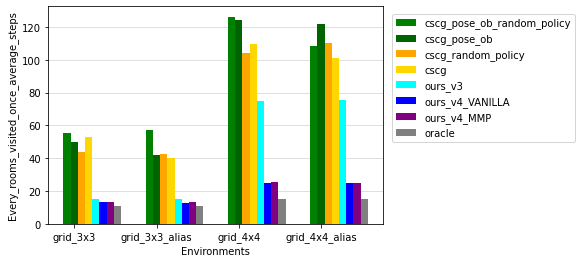

In [ ]:
#BAR PLOTS AVERAGE_STEPS
bar_plot(average_steps, envs, 'Every_rooms_visited_once_average_steps', 'Environments', model_names)

### Goal

[5.0, 2.5, nan, nan, 3.0, nan]


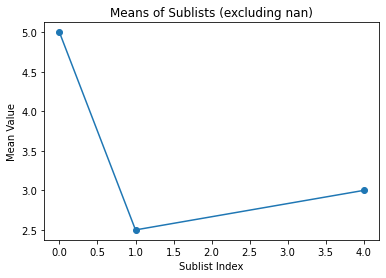

In [ ]:
average_steps_model = [[] for _ in range(6)]

# Append elements to each sublist
average_steps_model[0].append(5)
average_steps_model[1].append(2)
average_steps_model[1].append(3)
average_steps_model[4].append(3)

# Convert each sublist to a numpy array before calculating mean
means = [np.mean(np.array(sublist)) for sublist in average_steps_model]
print(means)
# Filter out nan values and corresponding indices
filtered_means = [mean for mean in means if not np.isnan(mean)]
indices = [i for i, mean in enumerate(means) if not np.isnan(mean)]

# Plot the non-nan values
plt.plot(indices, filtered_means, marker='o')
plt.xlabel('Sublist Index')
plt.ylabel('Mean Value')
plt.title('Means of Sublists (excluding nan)')
plt.show()

In [ ]:
from envs.modules import get_l2_distance, astar

def get_short_term_goal(env, input=None):
    if input is None:
        start_pose = env.curr_loc
    elif isinstance(input, dict):
        start_pose = input['pose_pred']
    else:
        raise ValueError('get_short_term_goal:Input type not recognised ' + str(type(input)))

    output = [0,0,0]
    goal_poses_row, goal_poses_col = env.get_goal_position(env.goal_ob)
    all_relative_dists = []
    for r, c in zip(goal_poses_row,goal_poses_col):
        relative_dist = get_l2_distance(r, start_pose[0], c, start_pose[1])
        all_relative_dists.append(relative_dist)
    if len(all_relative_dists) == 0:
        #Goal not in env
        return None
    closest_goal_idx = np.argmin(all_relative_dists)
    
    goal_row = goal_poses_row[closest_goal_idx]
    goal_col = goal_poses_col[closest_goal_idx]
    print('start_pose', start_pose,'(goal_row, goal_col)', (goal_row, goal_col))
    path = astar(env.rooms, start_pose, (goal_row, goal_col))
    print('path', path)
    if path == None:
        return None
    output[0] = int((0%360.)/5.) #angle
    output[1] = len(path) -1 #step dist
    output[2] = path #gt path #NB: might not be the unique best path
    return output

In [ ]:
string = 'couchey'
f=string.replace("hey","")
print(f, len(f))

couc 4


In [55]:
#GET AVERAGE STEPS REACHING GOAL BY GOAL DIST TO START
# import warnings
# warnings.filterwarnings('ignore')
envs = ['grid_3x3', 'grid_3x3_alias', 'grid_4x4', 'grid_4x4_alias' ,'grid_t_maze', 'grid_t_maze_alias', 'grid_donut']#
model_names = ['cscg', 'cscg_random_policy', 'cscg_pose_ob', 'cscg_pose_ob_random_policy' , 'ours_v4_MMP','ours_v4_MMP_wt_prior']
nav_type = 'goal'

average_steps = [[0]*(len(envs)) for _ in range(len(model_names))]
oracle_a_steps = [[0]*(len(envs)) for _ in range(len(model_names))]

for id_m, model_name in enumerate(model_names):
    if '_wt_prior' in model_name:
        load_model = True
        model_name = model_name.replace("_wt_prior","")
    else:
        load_model = False
    for id_e, env in enumerate(envs):
        a_failure = 0
        i = -1
        errors = []
        average_steps_model = [[] for _ in range(15)]
        oracle_a_steps_model = [[] for _ in range(15)]
        # Set the path to the folder containing the excel files
        if 'ours' in model_name:
            who = 'ours'
        else:
            who = 'cscg'
        folder_path = 'results/'+ env +'/' + who+'_'+ nav_type +'/'+model_name 
        if 'cscg' in model_name or load_model:
            folder_path+= '.pkl'
        print('folder_path',folder_path)
        df_list, filepath_list = retrieve_df_data_from_folder_path(folder_path,model_name, nav_type, load_model =load_model)
        print('model', model_name, 'env', env,'number of tests:', len(df_list), len(filepath_list))
        for df, filepath in zip(df_list, filepath_list):
            i+=1
            # print(df['goal'][0])
            env_setup = GridWorldEnv(env, possible_actions, goal=df['goal'][0])
            _,_ = env_setup.reset(eval(df['poses'][0]))
            output = env_setup.get_short_term_goal()
            if output == None: #Goal does not exist in env
                continue
            headers = list(df.columns.values)
            stop_condition_header = [s for s in headers if 'stop_condition_' in s][0]
            
            if df[stop_condition_header][0] == True or df[stop_condition_header][0]>0:
                #print(df['poses'][0], output[1], output[2], len(df['steps'])-2)
                #test = get_short_term_goal(env_setup)
                # if output[1] == 0:
                #     print(i,'n_steps', len(df['steps'])-2, 'oracle_steps', output[1])
                # if ( len(df['steps'])-2 - output[1]) >2:
                #     print(filepath)
                # print(filepath_list[i])
                average_steps_model[output[1]].append(len(df['steps'])-2) #-2 because we remove the 'STAY' action
                oracle_a_steps_model[output[1]].append(output[1])
               
            else:
                a_failure+=1 
                errors.append(df['error'][0])
            
                print('failure ', filepath_list[i])
        print('there is ', a_failure, ' failures in this model/env goal reaching')
        print('errors?', errors)
        print()
        means = [np.mean(np.array(sublist)) for sublist in average_steps_model]
        average_steps[id_m][id_e] = means
        means = [np.mean(np.array(sublist)) for sublist in oracle_a_steps_model]
        oracle_a_steps[id_m][id_e] = means
        #print('model', model_name,id_m, 'env', env, np.mean(average_steps_model))
        #THIS ASSUMES WE HAVE SQUARED ENVS
#         dim_env = [substring for substring in env.split('_') if 'x' in substring][0]
#         average_steps[-1][id_e] =  int(dim_env[-1]) * 4 -1
# model_names.append('oracle')
print('model[env[n_steps]]')        
print(average_steps)
print(oracle_a_steps)

oracle_a_steps_mean = np.nanmean(np.array(oracle_a_steps), axis=1)
average_steps_mean = np.nanmean(np.array(average_steps), axis=1)

print('model[n_steps]')     
print(average_steps_mean)
print(oracle_a_steps_mean)
# oracle_a_steps[0][0] = 5.0
# print(oracle_a_steps)

folder_path results/grid_3x3/cscg_goal/cscg.pkl
model cscg env grid_3x3 number of tests: 16 16
there is  0  failures in this model/env goal reaching
errors? []

folder_path results/grid_3x3_alias/cscg_goal/cscg.pkl
model cscg env grid_3x3_alias number of tests: 16 16
there is  0  failures in this model/env goal reaching
errors? []

folder_path results/grid_4x4/cscg_goal/cscg.pkl
model cscg env grid_4x4 number of tests: 44 44
there is  0  failures in this model/env goal reaching
errors? []

folder_path results/grid_4x4_alias/cscg_goal/cscg.pkl
model cscg env grid_4x4_alias number of tests: 20 20
there is  0  failures in this model/env goal reaching
errors? []

folder_path results/grid_t_maze/cscg_goal/cscg.pkl
model cscg env grid_t_maze number of tests: 20 20
there is  0  failures in this model/env goal reaching
errors? []

folder_path results/grid_t_maze_alias/cscg_goal/cscg.pkl
model cscg env grid_t_maze_alias number of tests: 9 9
there is  0  failures in this model/env goal reaching


In [54]:
average_steps

[[[0.0, 1.0, 2.0, 3.0, 4.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  [0.0,
   1.0,
   3.857142857142857,
   3.0,
   4.0,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan],
  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, nan, nan, nan, nan, nan, nan],
  [0.0,
   3.8333333333333335,
   4.333333333333333,
   4.75,
   9.0,
   10.0,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan],
  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
 [[0.0, 1.0, 2.0, 3.0, 4.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
  [0.0,
   1.3333333333333333,
   3.0,
   3.6666666666666665,
   4.0,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan],
  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, nan, nan, nan, nan, nan, nan],
  [0.0,


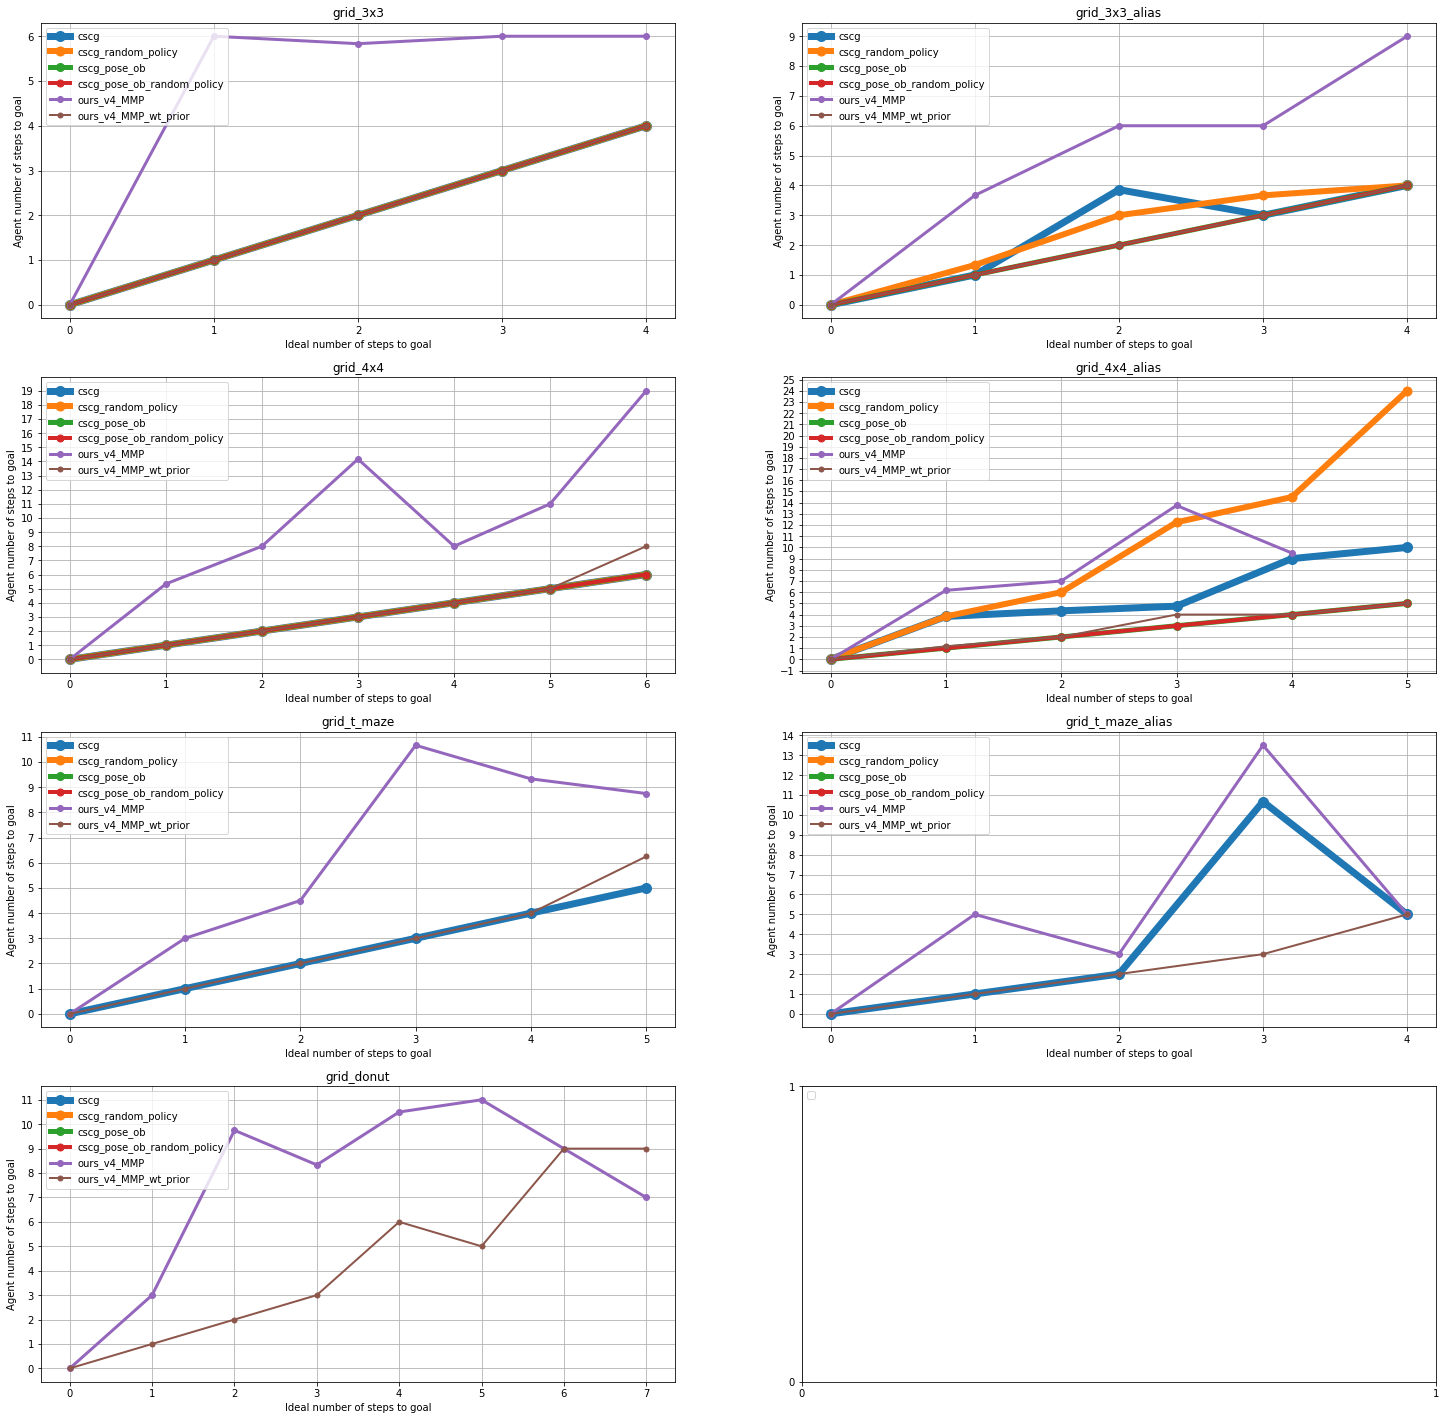

In [56]:
# fig, axes = plt.subplots(int(len(average_steps[0])/2), int(len(average_steps[0])/2))

on_row = 4
on_col = 2
fig, axes = plt.subplots(on_row, on_col, figsize=(25, 25))
plot_list = [[i, j] for i in range(on_row) for j in range(on_col)]

linewidth = len(average_steps) + 2
for m_id, model_list in enumerate(average_steps):
    for ax_id, env_steps in enumerate(model_list):
        # Filter out nan values
        sublist_filtered = [value for value in env_steps if not np.isnan(value)]
        ax_indexes = plot_list[ax_id]

        line_linewidth = linewidth - (m_id+1)  
        axes[ax_indexes[0], ax_indexes[1]].plot(sublist_filtered, marker='o', markersize=line_linewidth+3, linewidth=line_linewidth)

        axes[ax_indexes[0], ax_indexes[1]].set_title(envs[ax_id])
        axes[ax_indexes[0], ax_indexes[1]].set_xlabel('Ideal number of steps to goal')
        axes[ax_indexes[0], ax_indexes[1]].set_ylabel('Agent number of steps to goal')
        

for ax in axes.flat:
    ax.legend(model_names, loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.grid()

plt.show()

    # # Add labels and show the plot
    # plt.xlabel('Index')
    # plt.ylabel('Value')
    # plt.title('Sub-sublist Plots')

    # plt.show()